In [1]:
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, Y = datasets.make_classification(n_samples=1000, n_classes=2, random_state =3, n_clusters_per_class=1, n_features=2, n_informative=2, n_redundant=0)

In [3]:
print(X.shape, Y.shape)

(1000, 2) (1000,)


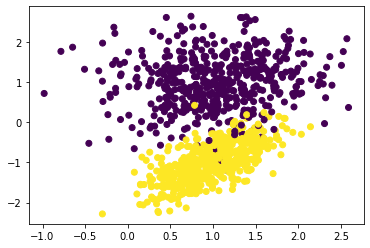

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [5]:
Y[Y==0] = -1

In [6]:
from numpy.lib.shape_base import tile
class svm:
  def __init__(self, C=1.0):
    self.C = C
    self.W = 0
    self.b = 0


  def hingeloss(self, W, b, X, Y):
    loss=0.0

    loss+= 0.5*(np.dot(W, W.T))
    m=X.shape[0]

    for i in range(m):
      ti = Y[i]*(np.dot(W, X[i].T)+b)
      loss+=self.C*max(0, (1-ti))

    return loss[0][0]

  def fit(self, X, Y, batch_size=100, learning_rate=0.001, maxItr = 100):
    no_features = X.shape[1]
    no_samples = X.shape[0]

    c = self.C
    W=np.zeros((1, no_features))
    bias=0
    h_loss = self.hingeloss(W, bias, X, Y)
    print(h_loss)

    # _________________________________________________
    losses = []
    for i in range(maxItr):
      print(f"\rOn {i}", end="")
      l=self.hingeloss(W, bias, X, Y)
      losses.append(l)

      ids = np.arange(no_samples)
      np.random.shuffle(ids)

      for batch_start in range(0, no_samples):

        grad_w = 0
        grad_b = 0

        for j in range(batch_start, batch_start + batch_size):
          if j< no_samples:
            i=ids[j]
            ti = Y[i]*(np.dot(W, X[i].T)+bias)

            if ti>=1:
              grad_w += 0
              grad_b += 0

            else:
              grad_w += c*Y[i]*X[i]
              grad_b += c*Y[i]

        W = W - learning_rate*W + learning_rate*grad_w
        bias = bias + learning_rate*grad_b

    self.W = W
    self.b = bias
    return W, bias, losses

In [ ]:
mysvm = svm()
W, b, losses = mysvm.fit(X, Y)

1000.0
On 35

In [ ]:
print(losses)

[1000.0, 100.83371264819611, 119.72459053156062, 98.7500085784632, 112.41364403078983, 124.56908704788796, 113.76924556984994, 102.21935811969692, 98.28218795681146, 110.32595974275368, 134.17897227329988, 109.48529326348923, 103.72469857112208, 96.86471945701305, 99.08786506547492, 98.82933476103507, 99.8110975580506, 109.18208721046716, 106.6519679065762, 106.50686233760453, 99.36434287628205, 100.93572179009503, 137.74157085519013, 108.91948687349851, 99.62615890508772, 101.29534889546628, 110.72111810749799, 101.34033278249183, 98.93638404223051, 100.6819371366689, 98.87070543937068, 99.05171964369084, 96.7560013903255, 99.41142598580119, 99.28250364819777, 102.78709010827079, 97.14089907113441, 106.39049182699488, 101.28492220135321, 99.39766654862412, 103.16313778272875, 104.56006808345485, 99.07494495974859, 106.26557081023101, 96.23980298582144, 96.89494466774752, 100.3411778517152, 147.7138587728787, 102.54111171413359, 106.1847343011583, 115.3107701743471, 95.14969882725453, 

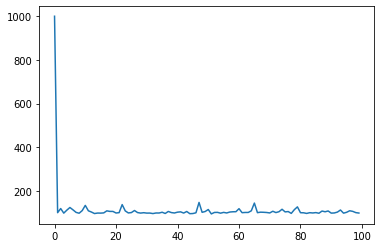

In [ ]:
plt.plot(losses)

In [ ]:
W, B = mysvm.W, mysvm.b
print(W, b)

[[ 0.64443674 -2.13652174]] -1.2650000000000148


In [ ]:
def viz_hyperplane(w1, w2, b):

  x1 = np.linspace(-1, 3, 10)
  x2 = -(w1*x1 + b)/w2

  xp = -(w1*x1 + b + 1)/w2
  xn = -(w1*x1 + b - 1)/w2 

  plt.figure(figsize = (12,12))
  plt.plot(x1,x2)
  plt.plot(x1, xp)
  plt.plot(x1, xn)
  plt.scatter(X[:,0], X[:,1], c=Y)
  plt.show

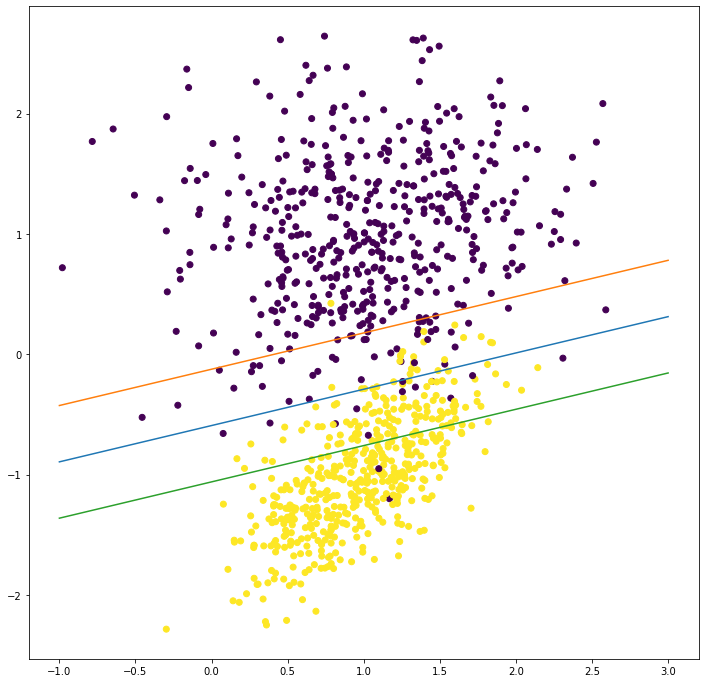

In [ ]:
viz_hyperplane(W[0, 0], W[0, 1], B)